In [1]:
import h5netcdf
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import csv
import os
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
import re
import cartopy.crs as ccrs
import cartopy.util as cutil
import xarray as xr
from matplotlib import animation
from matplotlib import cm
import string
import matplotlib.colors as mcolors
import matplotlib.backends.backend_pdf
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern Roman'],'size'   : 9})
rc('text', usetex=True)
import matplotlib.backends.backend_pdf

Get the data for the streamfunction


In [10]:
time = [60]
rundir = '../../actual_runs/runs_4_degree_with_customdeep/'

yearsdone = []
ranfory = []
BSF = []
MOC = []
TEMP = []
xt = []
yt = []
zt = []

for year in time:
    if os.path.exists(rundir + 'Run%i/run_%ima.current_run' % (year,year)):
        with open(rundir + 'Run%i/run_%ima.current_run' % (year,year)) as f:
            ranfor = int(f.readline())
        ranfory.append(ranfor)
        yearsdone.append(year)
        with xr.open_dataset(rundir + 'Run%i/run_%ima.%04d.averages.nc'% (year,year,ranfor-1)) as ds:
            BSF.append((ds['psi'].values)[0])
            TEMP.append((ds['temp'].values)[0][-1])
            if xt == []:
                xt = ds['xt'].values
                yt = ds['yt'].values
                zt = ds['zt'].values
        with xr.open_dataset(rundir + 'Run%i/run_%ima.%04d.overturning.nc'% (year,year,ranfor-1)) as ds:
            MOC.append(-(ds['vsf_depth'].values)[0] - (ds['bolus_depth'].values)[0])

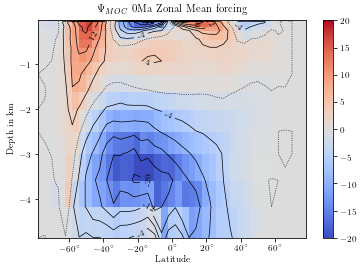

In [11]:
fig, ax = plt.subplots()

#MOC[0][MOC[0] == 0] = np.nan
result = ax.contour(yt,zt/1000,MOC[0]/1e6,13, colors='k',linewidths=0.7)
cb = ax.pcolormesh(yt,zt/1000,MOC[0]/1e6, cmap='coolwarm', vmin=-20,vmax=20)
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter(r"$%i^{\circ}$"))
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter("$%i$"))
ax.clabel(result,result.levels[::2], fontsize=9, inline=1,fmt="%i")
# Override the linestyles based on the levels.
for line, lvl in zip(result.collections, result.levels):
    if lvl < 0:
        line.set_linestyle('--')
    if lvl == 0:
        line.set_linestyle(':')
    else:
        # Optional; this is the default.
        line.set_linestyle('-')
plt.colorbar(cb)
plt.title(r'$\Psi_{MOC}$ 0Ma Zonal Mean forcing')
plt.xlabel('Latitude')
plt.ylabel('Depth in km')
#plt.savefig('../figures/overturning_0ma_old.png', dpi=400)
plt.show()

In [12]:
def newColor(N, start, end):
    vals = np.ones((N, 4))
    vals[:, 0] = np.linspace(start[0]/255, end[0]/255, N)
    vals[:, 1] = np.linspace(start[1]/255, end[1]/255, N)
    vals[:, 2] = np.linspace(start[2]/255, end[2]/255, N)
    return vals

c1 = newColor(20,[27,0,27],[50,0,0])
c2 = newColor(20,(27,0,27),(50,0,0))

# combine them and build a new colormap
colors = np.vstack((c1,c2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors, N=40)


[]

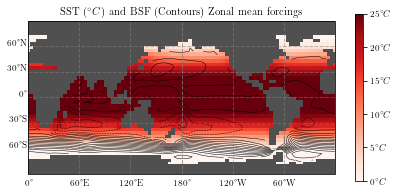

In [13]:
fig = plt.figure()
ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=180))
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

gl.xlabels_top = False
gl.ylabels_right = False

bsf, xtf = cutil.add_cyclic_point(BSF[0], coord=xt)
temp, _ = cutil.add_cyclic_point(TEMP[0], coord=xt)
temp = np.flip(temp,axis=0)
ax.imshow(np.tile(np.array([[[80, 80, 80]]], 
          dtype=np.uint8), [2, 2, 1]),
      origin='upper',
      transform=ccrs.PlateCarree(),
      extent=[-180, 180, -180, 180])

result = plt.contour(xtf,yt,bsf / 1e6, colors='black', vmin=-15, vmax=15, levels=20, transform=ccrs.PlateCarree(),linewidths = 0.5)

cmsa = plt.imshow(temp, cmap='Reds', vmin=0, vmax=25, origin='upper',extent=[-180, 180, -80, 80], transform=ccrs.PlateCarree(),interpolation='none')
plt.colorbar(cmsa,format=r"$%i^{\circ}C$",fraction=0.025, pad=0.06)
plt.title(r"SST ($^{\circ}C$) and BSF (Contours) Zonal mean forcings")
plt.savefig('../figures/BSF_0ma_old.png',dpi=400)
plt.plot()

